In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [91]:
import os
print(os.getcwd())

c:\Users\danie\Machine_Learning_House_Prediction_Project


In [3]:
import os
os.chdir('..')  # Move one level up to the parent directory
print(os.getcwd())  # Confirm the new working directory

c:\Users\danie\Machine_Learning_House_Prediction_Project


In [179]:
#FEATURE ENGINEERING

In [209]:
test_df = pd.read_csv('data/processed/test_data_cleaned_folder/test_data_cleaned.csv')
df = pd.read_csv('data/processed/training_data_cleaned_folder/training_data_cleaned.csv')

In [210]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1431,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1432,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1433,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1435 non-null   int64  
 1   MSSubClass     1435 non-null   int64  
 2   MSZoning       1435 non-null   object 
 3   LotFrontage    1435 non-null   float64
 4   LotArea        1435 non-null   int64  
 5   Street         1435 non-null   object 
 6   LotShape       1435 non-null   object 
 7   LandContour    1435 non-null   object 
 8   Utilities      1435 non-null   object 
 9   LotConfig      1435 non-null   object 
 10  LandSlope      1435 non-null   object 
 11  Neighborhood   1435 non-null   object 
 12  Condition1     1435 non-null   object 
 13  Condition2     1435 non-null   object 
 14  BldgType       1435 non-null   object 
 15  HouseStyle     1435 non-null   object 
 16  OverallQual    1435 non-null   int64  
 17  OverallCond    1435 non-null   int64  
 18  YearBuil

##### Feature Engineering: Age of the House (`AgeOfHouse`)

This feature calculates the number of years since the house was built until the year it was sold. Understanding the age of a house is crucial as it provides insights into the property's condition and historical value.

##### Formula:
`AgeOfHouse = YrSold - YearBuilt`

##### Purpose:
The `AgeOfHouse` feature helps capture the property's age, which can be an important predictor of its value and appeal to potential buyers.


In [212]:
df['AgeOfHouse'] = df['YrSold'] - df['YearBuilt']

##### Feature Engineering: Age Since Last Remodel (`HouseRemodelAge`)

This feature calculates the number of years since the house underwent its last major remodeling until the year it was sold. Remodeling can significantly influence a property's modernity and desirability.

##### Purpose:
The `HouseRemodelAge` feature provides insights into how recently the house was updated, which is a key factor in understanding its marketability and price.


In [213]:
df['HouseReamodelAge'] = df['YrSold'] - df['YearRemodAdd']

##### Feature Engineering: Total Square Footage (`TotalSqFt`)

This feature combines all the individual square footage values for a house to represent the total livable area across all floors. Buyers often consider the total square footage of a property as a primary indicator of its size and value.

##### Purpose:
The `TotalSqFt` feature aggregates the total area of the house, making it easier to analyze and compare properties. It captures the overall livable space, which is a significant determinant in pricing and buyer preferences.


In [214]:
df['HouseTotalSqFt'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
test_df['HouseTotalSqFt'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

In [215]:
df['TotalHouseArea'] = df['GrLivArea'] + + df['BsmtFinSF1'] + df['BsmtFinSF2']
test_df['TotalHouseArea'] = test_df['GrLivArea'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [216]:
df['TotalNumBaths'] = df['FullBath']  + df['BsmtFullBath'] + df['FullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'] + df['HalfBath'])
test_df['TotalNumBaths'] =  test_df['FullBath']  + test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'] + test_df['HalfBath'])

In [217]:
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
test_df['TotalPorchArea'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [218]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,AgeOfHouse,HouseReamodelAge,HouseTotalSqFt,TotalHouseArea,TotalNumBaths,TotalPorchArea
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,5,5,2566,2416,6.0,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,31,31,2524,2240,4.5,298
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,7,6,2706,2272,6.0,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,91,36,2473,1933,3.0,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,8,8,3343,2853,6.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,8,7,2600,1647,5.0,40
1431,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,32,22,3615,3026,5.0,349
1432,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,69,4,3492,2615,4.0,60
1433,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,60,14,2156,2156,3.0,478


After Doing The feature Engineering we will consider multiple cases to keep the some of the columns to see what fits best for the algorithims

In [219]:
#Dropping columns that are not needed we can change this later on if needed for better results
columns_to_delete = ['Id', 'WoodDeckSF', 'ScreenPorch' ,'3SsnPorch' , 
                     'EnclosedPorch', 'OpenPorchSF', 
                     'HalfBath','BsmtHalfBath', 'BsmtFullBath', 'FullBath', 
                     'BsmtFinSF2', 'BsmtFinSF1' , 'GrLivArea','2ndFlrSF', '1stFlrSF', 'TotalBsmtSF']

df = df.drop(columns=columns_to_delete, inplace=False)
test_df = test_df.drop(columns=columns_to_delete, inplace=False)

## Purpose of the Heatmap

### Why Create a Heatmap?

A heatmap is a powerful visualization tool for understanding the relationships between numerical variables in a dataset. By representing the correlation matrix visually, it helps us quickly identify patterns and relationships that may not be immediately apparent from raw data or numerical summaries.

### Objective:
The purpose of creating a heatmap in this analysis is to:
- **Identify Strong Relationships**: Highlight numerical features that have a strong positive or negative correlation with the target variable (e.g., `SalePrice`). These relationships can help prioritize which features are more likely to be predictive of the target.
- **Detect Multicollinearity**: Pinpoint pairs of features that are highly correlated with each other. Multicollinearity can reduce the effectiveness of a predictive model, so identifying these relationships can guide feature selection or engineering.
- **Feature Selection**: Help in deciding which variables to include in the model by understanding how strongly they relate to the target and to each other


<Axes: >

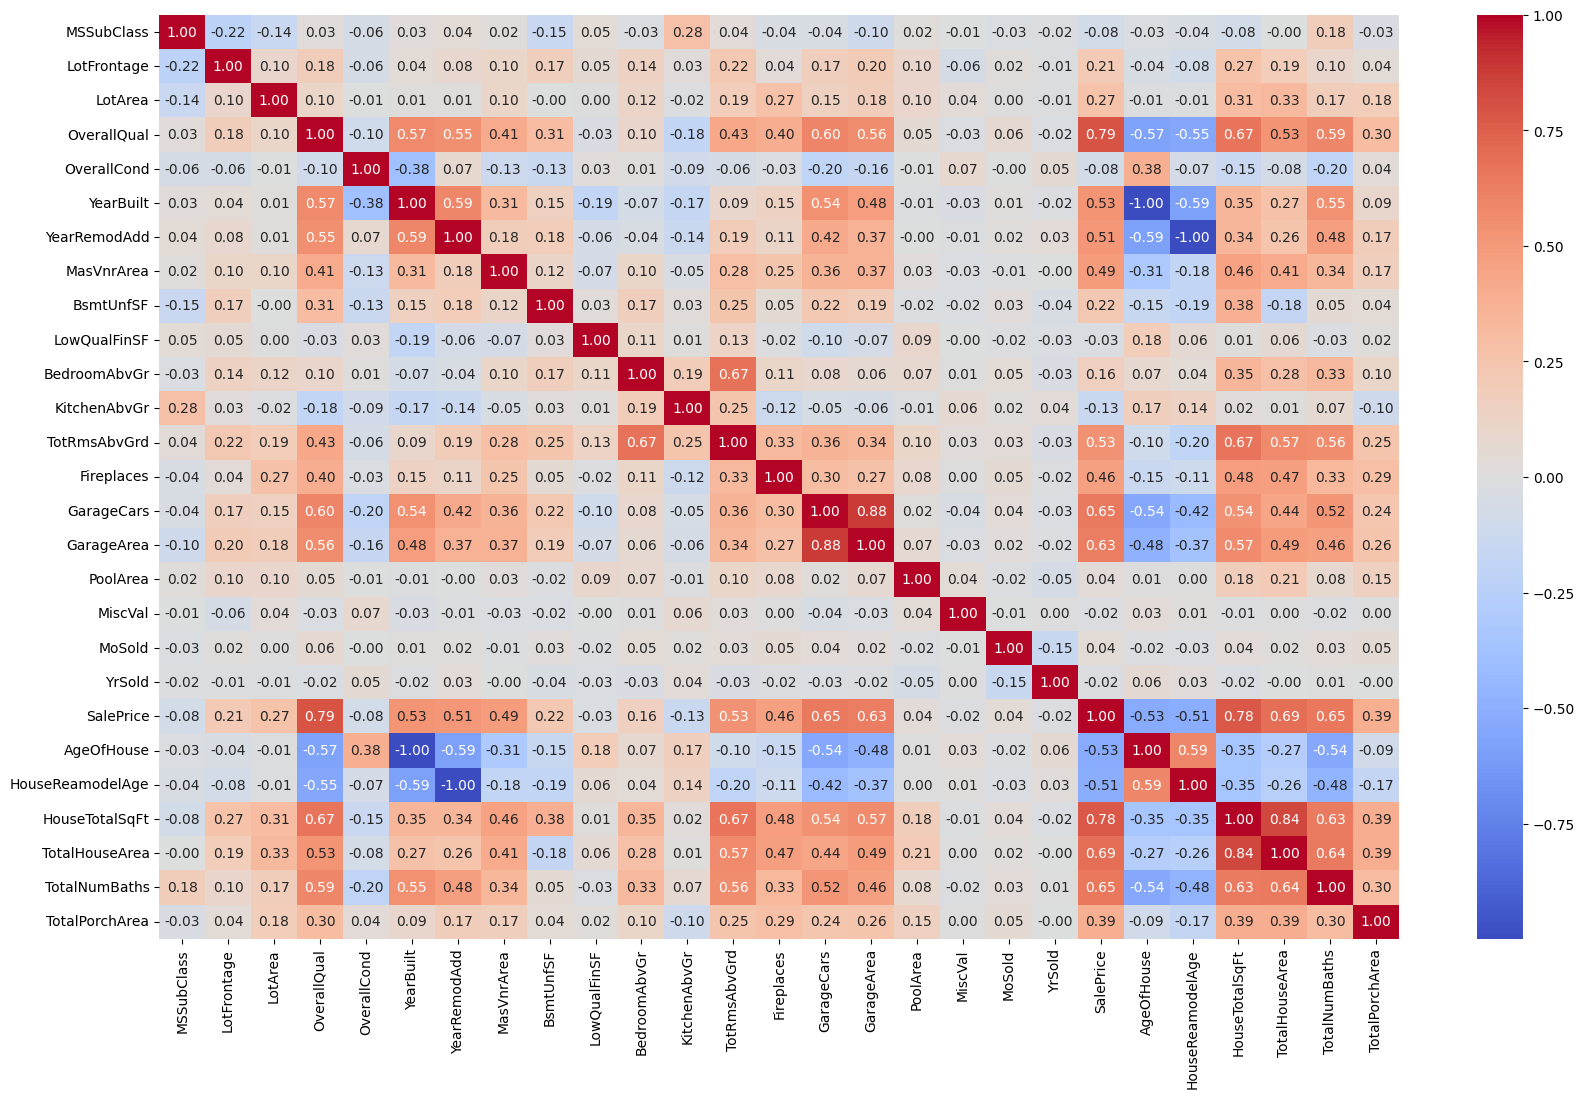

In [220]:
correlation =df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

We see from the heatmap that GarageArea and GarageCars have high correlation which means we need to pick form the two but since the correlation of GarageCars with SalePrice is slighy higher than GarageArea we should remove GarageArea

### Log Transformation of SalePrice

The histogram above shows the original distribution of the `SalePrice` feature. It is evident that the distribution is right-skewed, meaning that there are many houses with lower prices and a few houses with extremely high prices.

#### Purpose of Log Transformation:
1. **Normalize the Distribution**:
   - A normal distribution is often preferred in machine learning models, especially for regression tasks, as it improves the performance and interpretability of the model. The log transformation helps reduce the skewness of the data and brings it closer to a normal distribution.

2. **Reduce the Impact of Outliers**:
   - Extremely high sale prices (outliers) can disproportionately influence the results of the model. By applying a log transformation, the impact of these outliers is minimized, making the model more robust.

3. **Improve Model Accuracy**:
   - Many machine learning algorithms perform better when the target variable is normally distributed. The log transformation ensures that the distribution of `SalePrice` aligns better with the assumptions of these algorithms, potentially leading to higher accuracy and more reliable predictions.

By transforming `SalePrice` with a logarithmic function, we aim to enhance the model's ability to capture meaningful relationships between features and the target variable while reducing the influence of extreme values.


In [221]:
df = df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

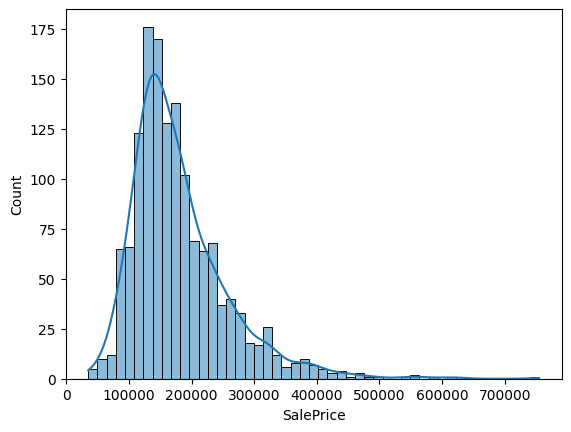

In [222]:
sns.histplot(df['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

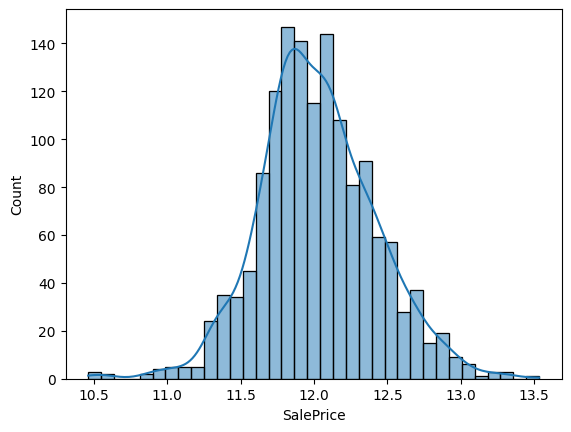

In [223]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'], kde=True)

We can see from the heatmap that GarageArea and HouseTotalSqFt we can due to the highcorrelation

In [224]:
df.dtypes[df.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [225]:
df.dtypes[df.dtypes != 'object']

MSSubClass            int64
LotFrontage         float64
LotArea               int64
OverallQual           int64
OverallCond           int64
YearBuilt             int64
YearRemodAdd          int64
MasVnrArea          float64
BsmtUnfSF             int64
LowQualFinSF          int64
BedroomAbvGr          int64
KitchenAbvGr          int64
TotRmsAbvGrd          int64
Fireplaces            int64
GarageCars            int64
PoolArea              int64
MiscVal               int64
MoSold                int64
YrSold                int64
SalePrice           float64
AgeOfHouse            int64
HouseReamodelAge      int64
HouseTotalSqFt        int64
TotalHouseArea        int64
TotalNumBaths       float64
TotalPorchArea        int64
dtype: object

### Encoding Categorical Features

When preparing categorical data for machine learning models, it is crucial to select the appropriate encoding method to ensure the model interprets the features correctly for features with object types. Below is an explanation of the two primary encoding methods used and how I divided the features to prepare it for the models, as derived from analyzing the `data_description.txt` file:

- **OrdinalEncoder**:
  - Used for categorical features with a clear order or ranking (e.g., quality ratings like `Poor`, `Average`, `Good`), which is seen with features such as `LandSlope`, `BsmtQual`, `HeatingQC`, etc.

- **OneHotEncoder**:
  - Used for categorical features without a natural order (e.g., neighborhood names or product types), such as `Street`, `Neighborhood`, and `SaleType`.


In [226]:
ordinal_Encoding_features =  ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']



In [227]:
one_hot_Encoding_feature = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

We will now create a pipeline to preprocess the data for each type of feature and then combine them into a single pipeline

## Preprocessing Pipelines for Data Preparation

This section documents the preprocessing pipelines used to prepare the data for modeling. The pipelines handle imputation, scaling, and encoding based on the type of data: numerical, ordinal categorical, and nominal categorical. These pipelines ensure that the data is clean, standardized, and properly encoded for downstream machine learning models.


In [228]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('SalePrice')

In [229]:
numeric_columns_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
]) 

In [230]:
ordinal_Encoding_features_pipeline =Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [231]:
one_hot_Encoding_feature_pipeline =  Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [232]:
columns_transformer = ColumnTransformer(transformers = [
    ('numeric_pipline', numeric_columns_pipeline, numeric_columns),
    ('ordinal_pipeline', ordinal_Encoding_features_pipeline, ordinal_Encoding_features), 
    ('one_hot_pipeline', one_hot_Encoding_feature_pipeline, one_hot_Encoding_feature)],
    remainder='passthrough', 
    n_jobs=-1)

In [233]:
pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformer)
])

In [234]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [236]:
X_preprocessed  = pipeline.fit_transform(X)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [239]:
linearRegression  = LinearRegression()

In [240]:
linearRegression.fit(X_train, y_train)

LinearRegression()

In [241]:
y_pred_linearRegression = linearRegression.predict(X_test)

In [242]:
mean_squared_error(y_test, y_pred_linearRegression)

0.015612893212261692

In [243]:
RFR = RandomForestRegressor(random_state=13)

In [244]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [245]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [246]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [255]:
np.sqrt(-1 * rfr_cv.best_score_)

0.140781616022541

In [256]:
XGB = XGBRegressor(random_state=13)

In [257]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [258]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [260]:
# Ensure the latest versions of scikit-learn and xgboost are installed
%pip install -U scikit-learn xgboost

# Fit the model
xgb_cv.fit(X_train, y_train)

Note: you may need to restart the kernel to use updated packages.


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
''''
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
''''

SyntaxError: unterminated string literal (detected at line 39) (3235033281.py, line 39)

In [207]:
''''
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
''''

SyntaxError: unterminated string literal (detected at line 39) (3235033281.py, line 39)

In [ ]:
'''
MSSubClass            int64
LotFrontage         float64
LotArea               int64
OverallQual           int64
OverallCond           int64
YearBuilt             int64
YearRemodAdd          int64
MasVnrArea          float64
BsmtUnfSF             int64
LowQualFinSF          int64
BedroomAbvGr          int64
KitchenAbvGr          int64
TotRmsAbvGrd          int64
Fireplaces            int64
GarageCars            int64
PoolArea              int64
MiscVal               int64
MoSold                int64
YrSold                int64
SalePrice           float64
AgeOfHouse            int64
HouseReamodelAge      int64
HouseTotalSqFt        int64
TotalHouseArea        int64
TotalNumBaths       float64
TotalPorchArea        int64



'''